<a href="https://colab.research.google.com/github/PurvaChiniya/Effects-of-image-quality-on-deep-nueral-network-paper-code/blob/master/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD THE MODEL

In [130]:
cd '/content/drive/My Drive/proposal'

/content/drive/My Drive/proposal


In [131]:
from google.colab import drive
drive.mount('/content/drive')
zipfile='/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip'
from zipfile import ZipFile
#with ZipFile('/content/drive/My Drive/proposal/ILSVRC2012_img_val.zip', 'r') as zipObj:
    # Extract all the contents of zip file in current directory
 #   zipObj.extractall()
  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2
from keras import backend as K
from keras.utils import to_categorical
import tensorflow
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import matplotlib.pyplot as plt
import os
from keras.applications import vgg16
from natsort import natsorted
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt


In [0]:

path="/content/drive/My Drive/proposal/ILSVRC2012_img_val"

In [0]:
PathArray=np.array(natsorted([os.path.join(root, file) for root, dirs, files in os.walk(path) for file in files]))


In [135]:
len(PathArray)

50000

In [0]:
np.save("/content/drive/My Drive/proposal/PathArray",PathArray)

In [137]:
WordList = np.array([os.path.basename(i).split('_')[-1][:-4] for i in PathArray])
X=PathArray[:int(len(PathArray)*
                 0.01)]
Y=WordList[:int(len(PathArray)*0.01)]
print("no of images in the dataset are:", len(X))
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


no of images in the dataset are: 500


In [0]:
meta = scipy.io.loadmat("/content/drive/My Drive/proposal/meta.mat")
original_idx_to_synset = {}
synset_to_name = {}

for i in range(1000):
    ilsvrc2012_id = int(meta["synsets"][i,0][0][0][0])
    synset = meta["synsets"][i,0][1][0]
    name = meta["synsets"][i,0][2][0]
    original_idx_to_synset[ilsvrc2012_id] = synset
    synset_to_name[synset] = name

synset_to_keras_idx = {}
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    synset_to_keras_idx[parts[0]] = idx
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

def convert_original_idx_to_keras_idx(idx):
    return synset_to_keras_idx[original_idx_to_synset[idx]]

In [139]:

X.shape

(500,)

In [140]:

%%time
X_val_contrast_one= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
X_val=np.zeros((len(X),224,224,3),dtype=np.float32)
def humansize(nbytes):
    '''From https://stackoverflow.com/questions/14996453/python-libraries-to-calculate-human-readable-filesize-from-bytes'''
    suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])
print(humansize(X_val.nbytes))

287.11 MB
CPU times: user 232 ms, sys: 15 ms, total: 247 ms
Wall time: 250 ms


In [141]:
%%time
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    
    # Crop
    height, width, _ = img.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    img = img[starty:starty+224,startx:startx+224]
    assert img.shape[0] == 224 and img.shape[1] == 224, (img.shape, height, width)
    
    # Save (as RGB)
    X_val[i,:,:,:] = img[:,:,::-1]

0/500
CPU times: user 3.81 s, sys: 311 ms, total: 4.13 s
Wall time: 11.6 s


In [142]:
%%time
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.9, gray, 0.1, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_one[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.06 s, sys: 340 ms, total: 4.4 s
Wall time: 11.6 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val",X_val)
np.save("/content/drive/My Drive/proposal/X_val_contrast_one",X_val_contrast_one)

In [144]:
%%time
X_val_contrast_two= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.8, gray, 0.2, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_two[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.32 s, sys: 410 ms, total: 4.73 s
Wall time: 13 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_two",X_val_contrast_two)

In [146]:
%%time
X_val_contrast_three= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.7, gray, 0.3, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_three[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.16 s, sys: 550 ms, total: 4.71 s
Wall time: 12 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_three",X_val_contrast_three)

In [148]:
%%time
X_val_contrast_four= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.6, gray, 0.4, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_four[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.99 s, sys: 381 ms, total: 5.37 s
Wall time: 13 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_four",X_val_contrast_four)

In [150]:
%%time
X_val_contrast_five= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.5, gray, 0.5, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_five[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.69 s, sys: 373 ms, total: 5.07 s
Wall time: 12.7 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_five",X_val_contrast_five)

In [152]:
%%time
X_val_contrast_six= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.4, gray, 0.6, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_six[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.29 s, sys: 357 ms, total: 4.65 s
Wall time: 11.9 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_six",X_val_contrast_six)

In [154]:
%%time
X_val_contrast_seven= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.3, gray, 0.7, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_seven[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.77 s, sys: 391 ms, total: 5.16 s
Wall time: 12.7 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_seven",X_val_contrast_seven)

In [156]:
%%time
X_val_contrast_eight= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.2, gray, 0.8, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_eight[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 5.24 s, sys: 398 ms, total: 5.63 s
Wall time: 13.8 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_eight",X_val_contrast_eight)

In [158]:
%%time
X_val_contrast_nine= np.zeros((len(X), 224, 224, 3), dtype=np.float32)
for i in range(len(X)):
    if i %500 == 0:
        print("%d/%d" % (i, len(X)))
    
    # Load (as BGR)
    img = cv2.imread(PathArray[i])
    
    # Resize
    height, width, _ = img.shape
    new_height = height * 256 // min(img.shape[:2])
    new_width = width * 256 // min(img.shape[:2]) 
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray= np.stack((gray,)*3, axis=-1)
    im = cv2.addWeighted(img, 0.1, gray, 0.9, 0) 
  
    # Crop
    height, width, _ = im.shape
    startx = width//2 - (224//2)
    starty = height//2 - (224//2)
    im = im[starty:starty+224,startx:startx+224]
    assert im.shape[0] == 224 and im.shape[1] == 224, (im.shape, height, width)
    
    # Save (as RGB)
    X_val_contrast_nine[i,:,:,:] = im[:,:,::-1]

0/500
CPU times: user 4.98 s, sys: 380 ms, total: 5.36 s
Wall time: 13 s


In [0]:
np.save("/content/drive/My Drive/proposal/X_val_contrast_nine",X_val_contrast_nine)

#PREDICTIONS OF EACH CONTRAST SETTING

In [0]:
f = open("/content/drive/My Drive/proposal/ILSVRC2012_validation_ground_truth.txt","r")
Y_val = f.read().strip().split("\n")
Y_val = list(map(int, Y_val))
Y_val = np.array([convert_original_idx_to_keras_idx(idx) for idx in Y_val])
f.close()
keras_idx_to_name = {}
f = open("/content/drive/My Drive/proposal/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

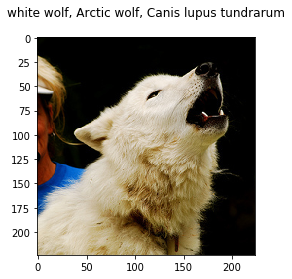

In [161]:
plt.figure()
plt.imshow(X_val[90] / 255.0)
plt.title(keras_idx_to_name[Y_val[90]])
plt.show()
plt.close()

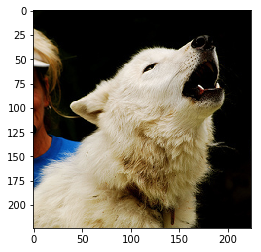

In [162]:
plt.imshow(X_val_contrast_one[90]/255.0)

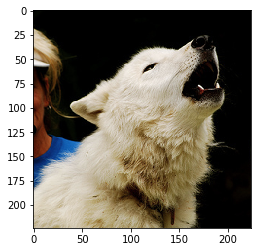

In [163]:
plt.imshow(X_val_contrast_two[90]/255.0)

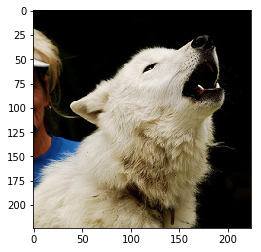

In [164]:
plt.imshow(X_val_contrast_three[90]/255.0)

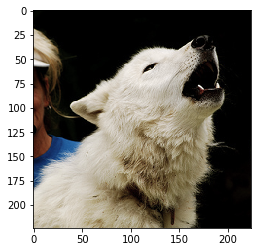

In [165]:
plt.imshow(X_val_contrast_four[90]/255.0)

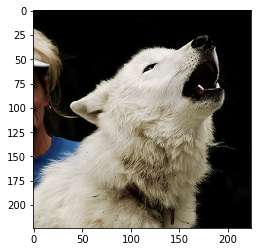

In [166]:
plt.imshow(X_val_contrast_five[90]/255.0)

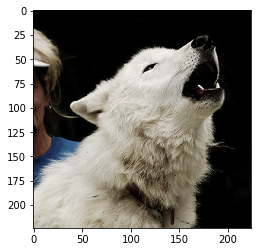

In [167]:
plt.imshow(X_val_contrast_six[90]/255.0)

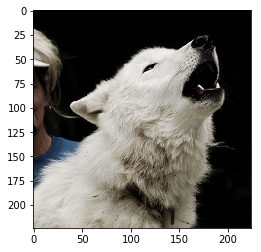

In [168]:
plt.imshow(X_val_contrast_seven[90]/255.0)

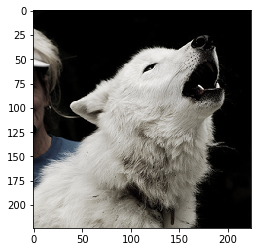

In [169]:
plt.imshow(X_val_contrast_eight[90]/255.0)

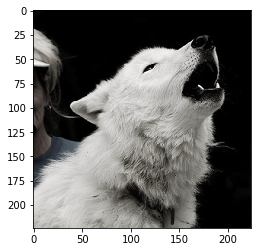

In [170]:
plt.imshow(X_val_contrast_nine[90]/255.0)

#PREDICTIONS

In [171]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.7407995), ('n02134084', 'ice_bear', 0.07656124), ('n02104029', 'kuvasz', 0.06675256), ('n02111500', 'Great_Pyrenees', 0.057337455), ('n02111889', 'Samoyed', 0.030293772)]]


In [172]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_one[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.7486237), ('n02104029', 'kuvasz', 0.07087195), ('n02111500', 'Great_Pyrenees', 0.065018706), ('n02134084', 'ice_bear', 0.053765167), ('n02111889', 'Samoyed', 0.035152715)]]


In [173]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_two[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.7536356), ('n02111500', 'Great_Pyrenees', 0.07059952), ('n02104029', 'kuvasz', 0.06919538), ('n02111889', 'Samoyed', 0.044795614), ('n02134084', 'ice_bear', 0.037871026)]]


In [174]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_three[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.732475), ('n02111500', 'Great_Pyrenees', 0.08327505), ('n02104029', 'kuvasz', 0.07413209), ('n02111889', 'Samoyed', 0.059690546), ('n02134084', 'ice_bear', 0.027568493)]]


In [175]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_four[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.6818876), ('n02111500', 'Great_Pyrenees', 0.10656146), ('n02104029', 'kuvasz', 0.08621293), ('n02111889', 'Samoyed', 0.08118156), ('n02134084', 'ice_bear', 0.02077809)]]


In [176]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_five[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.60956895), ('n02111500', 'Great_Pyrenees', 0.14285867), ('n02111889', 'Samoyed', 0.10912566), ('n02104029', 'kuvasz', 0.100760765), ('n02134084', 'ice_bear', 0.01442366)]]


In [177]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_six[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02114548', 'white_wolf', 0.45930898), ('n02111500', 'Great_Pyrenees', 0.21356633), ('n02111889', 'Samoyed', 0.15883575), ('n02104029', 'kuvasz', 0.1359521), ('n02134084', 'ice_bear', 0.009599516)]]


In [178]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_seven[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02111500', 'Great_Pyrenees', 0.31735697), ('n02114548', 'white_wolf', 0.26060474), ('n02111889', 'Samoyed', 0.20197923), ('n02104029', 'kuvasz', 0.19497165), ('n02134084', 'ice_bear', 0.005765569)]]


In [179]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_eight[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n02111500', 'Great_Pyrenees', 0.45772505), ('n02104029', 'kuvasz', 0.27181092), ('n02111889', 'Samoyed', 0.15675364), ('n02114548', 'white_wolf', 0.0982828), ('n02134084', 'ice_bear', 0.003193096)]]


In [180]:
#img = image.load_img(X[90], target_size=(224, 224))
#x = image.img_to_array(img)
x = np.expand_dims(X_val_contrast_nine[90], axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)
preds = vgg_model.predict(x)
y_predicted=decode_predictions(preds)
print('Predicted:', decode_predictions(preds))


Input image shape: (1, 224, 224, 3)
Predicted: [[('n02111500', 'Great_Pyrenees', 0.5317887), ('n02104029', 'kuvasz', 0.3299628), ('n02111889', 'Samoyed', 0.086108536), ('n02114548', 'white_wolf', 0.04183313), ('n02134084', 'ice_bear', 0.0020256988)]]


#ACCURACY METRIC FOR DIFFERENT BLENDING RATIOS FOR CONTRAST

In [0]:
#BLENDING RATIO=1
%%time
predicted_labels_one=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_one.append(y_predicted)

In [0]:
def top_one_accuracy(predicted_labels):
    count=0
    seperator=" "
    for i in range(len(X)):
        a=list(predicted_labels[i][0][0])
        a=a[1].split("_")
        a=seperator.join(a)
        b=(keras_idx_to_name[Y_val[i]]).split("\n")
        if a==b[0]:
          count=count+1
        else:
          count=count
          
    return (count/len(X))*100  
def top_five_percent_accuracy(predicted_labels):
    count_for_top_five=0
    seperator=" "
    for i in range(len(X)):
        b=(keras_idx_to_name[Y_val[i]]).split("\n")
        for j in range(5):
            a=list(predicted_labels[i][0][j])
            a=a[1].split("_")
            a=seperator.join(a)
            if (a==b[0]):
                count_for_top_five=count_for_top_five+1
    return (count_for_top_five/len(X))*100             
           

In [238]:
top_one_percent_acc_blending_one=top_one_accuracy(predicted_labels_one)
print("top_one_percent_accuracy_blending_one:",top_one_percent_acc_blending_one,"%")

top_one_percent_accuracy_blending_one: 35.199999999999996 %


In [239]:
top_five_percent_acc_blending_one=top_five_percent_accuracy(predicted_labels_one)
print("top five percent accuracy_blending_one:",top_five_percent_acc_blending_one,"%")  

top five percent accuracy_blending_one: 45.4 %


In [0]:
Top_five_percent_acc=[]
Top_one_percent_acc=[]
Top_one_percent_acc.append(top_one_percent_acc_blending_one)
Top_five_percent_acc.append(top_five_percent_acc_blending_one)

#BLENDING RATIO 0.9

In [186]:
#BLENDING RATIO=0.9
%%time
predicted_labels_two=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_one[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_two.append(y_predicted)

CPU times: user 9min 26s, sys: 3.35 s, total: 9min 30s
Wall time: 5min 2s


In [241]:
top_one_percent_acc_blending_point_nine=top_one_accuracy(predicted_labels_two)
print("top_one_percent_accuracy_blending_point_nine:",top_one_percent_acc_blending_point_nine,"%")
top_five_percent_acc_blending_point_nine=top_five_percent_accuracy(predicted_labels_two)
print("top five percent accuracy_blending_point_nine:",top_five_percent_acc_blending_point_nine,"%")  

top_one_percent_accuracy_blending_point_nine: 34.8 %
top five percent accuracy_blending_point_nine: 45.4 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_nine)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_nine)

#BLENDING_RATIO_0.8

In [191]:
%%time
#BLENDING RATIO=0.8
predicted_labels_three=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_two[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_three.append(y_predicted)

CPU times: user 9min 15s, sys: 3.32 s, total: 9min 18s
Wall time: 4min 56s


In [220]:
top_one_percent_acc_blending_point_eight=top_one_accuracy(predicted_labels_three)
print("top_one_percent_accuracy_blending_point_eight:",top_one_percent_acc_blending_point_eight,"%")
top_five_percent_acc_blending_point_eight=top_five_percent_accuracy(predicted_labels_three)
print("top five percent accuracy_blending_point_eight:",top_five_percent_acc_blending_point_eight,"%")  

top_one_percent_accuracy_blending_point_eight: 34.599999999999994 %
top five percent accuracy_blending_point_eight: 45.4 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_eight)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_eight)

#BLENDING RATIO 0.7

In [194]:
%%time
#BLENDING RATIO=0.7
predicted_labels_four=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_three[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_four.append(y_predicted)

CPU times: user 9min 23s, sys: 3.36 s, total: 9min 26s
Wall time: 5min


In [244]:
top_one_percent_acc_blending_point_seven=top_one_accuracy(predicted_labels_four)
print("top_one_percent_accuracy_blending_point_seven:",top_one_percent_acc_blending_point_seven,"%")
top_five_percent_acc_blending_point_seven=top_five_percent_accuracy(predicted_labels_four)
print("top five percent accuracy_blending_point_seven:",top_five_percent_acc_blending_point_seven,"%")  

top_one_percent_accuracy_blending_point_seven: 34.4 %
top five percent accuracy_blending_point_seven: 45.4 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_seven)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_seven)

#BLENDING_RATIO_0.6

In [197]:
%%time
#BLENDING RATIO=0.6
predicted_labels_five=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_four[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_five.append(y_predicted)

CPU times: user 9min 21s, sys: 3.34 s, total: 9min 24s
Wall time: 5min


In [246]:
print("top_one_percent_accuracy_blending_point_six:",top_one_accuracy(predicted_labels_five),"%")
print("top five percent accuracy_blending_point_six:",top_five_percent_accuracy(predicted_labels_five),"%")  

top_one_percent_accuracy_blending_point_six: 33.6 %
top five percent accuracy_blending_point_six: 45.6 %


In [0]:
Top_one_percent_acc.append(top_one_accuracy(predicted_labels_five))
Top_five_percent_acc.append(top_five_percent_accuracy(predicted_labels_five))

#BLENDING_RATIO_0.5

In [200]:
%%time
#BLENDING RATIO=0.5
predicted_labels_six=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_five[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_six.append(y_predicted)

CPU times: user 9min 19s, sys: 3.32 s, total: 9min 22s
Wall time: 4min 58s


In [248]:
print("top_one_percent_accuracy_blending_point_five:",top_one_accuracy(predicted_labels_six),"%")
print("top five percent accuracy_blending_point_five:",top_five_percent_accuracy(predicted_labels_six),"%")  

top_one_percent_accuracy_blending_point_five: 33.800000000000004 %
top five percent accuracy_blending_point_five: 45.0 %


In [0]:
Top_one_percent_acc.append(top_one_accuracy(predicted_labels_six))
Top_five_percent_acc.append(top_five_percent_accuracy(predicted_labels_six))

#BLENDING_RATIO_0.4

In [202]:
%%time
#BLENDING RATIO=0.4
predicted_labels_seven=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_six[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_seven.append(y_predicted)

CPU times: user 9min 16s, sys: 3.36 s, total: 9min 19s
Wall time: 4min 57s


In [250]:
top_one_percent_acc_blending_point_four=top_one_accuracy(predicted_labels_seven)
print("top_one_percent_accuracy_blending_point_four:",top_one_percent_acc_blending_point_four,"%")
top_five_percent_acc_blending_point_four=top_five_percent_accuracy(predicted_labels_seven)
print("top five percent accuracy_blending_point_four:",top_five_percent_acc_blending_point_four,"%")  

top_one_percent_accuracy_blending_point_four: 32.800000000000004 %
top five percent accuracy_blending_point_four: 44.0 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_four)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_four)

#BLENDING_RATIO_0.3

In [203]:
%%time
#BLENDING RATIO=0.3
predicted_labels_eight=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_seven[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_eight.append(y_predicted)

CPU times: user 9min 18s, sys: 3.39 s, total: 9min 22s
Wall time: 4min 58s


In [252]:
top_one_percent_acc_blending_point_three=top_one_accuracy(predicted_labels_eight)
print("top_one_percent_accuracy_blending_point_three:",top_one_percent_acc_blending_point_three,"%")
top_five_percent_acc_blending_point_three=top_five_percent_accuracy(predicted_labels_eight)
print("top five percent accuracy_blending_point_three:",top_five_percent_acc_blending_point_three,"%")  

top_one_percent_accuracy_blending_point_three: 32.2 %
top five percent accuracy_blending_point_three: 43.0 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_three)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_three)

#BLENDING_RATIO_0.2

In [208]:
%%time
#BLENDING RATIO=0.2
predicted_labels_nine=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_eight[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_nine.append(y_predicted)

CPU times: user 9min 16s, sys: 3.36 s, total: 9min 19s
Wall time: 4min 56s


In [254]:
top_one_percent_acc_blending_point_two=top_one_accuracy(predicted_labels_nine)
print("top_one_percent_accuracy_blending_point_two:",top_one_percent_acc_blending_point_two,"%")
top_five_percent_acc_blending_point_two=top_five_percent_accuracy(predicted_labels_nine)
print("top five percent accuracy_blending_point_two:",top_five_percent_acc_blending_point_two,"%")  

top_one_percent_accuracy_blending_point_two: 29.799999999999997 %
top five percent accuracy_blending_point_two: 42.0 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_two)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_two)

#BLENDING_RATIO_0.1

In [211]:
%%time
#BLENDING RATIO=0.1
predicted_labels_ten=[]
for i in range(len(X)):
  #img = image.load_img(X[i], target_size=(224, 224))
  #x = image.img_to_array(img)
  x = np.expand_dims(X_val_contrast_nine[i], axis=0)
  x = preprocess_input(x)
  preds = vgg_model.predict(x)
  y_predicted=decode_predictions(preds)
  predicted_labels_ten.append(y_predicted)

CPU times: user 9min 19s, sys: 3.37 s, total: 9min 22s
Wall time: 4min 58s


In [256]:
top_one_percent_acc_blending_point_one=top_one_accuracy(predicted_labels_ten)
print("top_one_percent_accuracy_blending_point_one:",top_one_percent_acc_blending_point_one,"%")
top_five_percent_acc_blending_point_one=top_five_percent_accuracy(predicted_labels_ten)
print("top five percent accuracy_blending_point_one:",top_five_percent_acc_blending_point_one,"%")  

top_one_percent_accuracy_blending_point_one: 29.799999999999997 %
top five percent accuracy_blending_point_one: 41.4 %


In [0]:
Top_one_percent_acc.append(top_one_percent_acc_blending_point_one)
Top_five_percent_acc.append(top_five_percent_acc_blending_point_one)

#RESULTS

In [258]:
Top_one_percent_acc

[35.199999999999996,
 34.8,
 34.599999999999994,
 34.4,
 33.6,
 33.800000000000004,
 32.800000000000004,
 32.2,
 29.799999999999997,
 29.799999999999997]

In [259]:
Top_five_percent_acc

[45.4, 45.4, 45.4, 45.4, 45.6, 45.0, 44.0, 43.0, 42.0, 41.4]

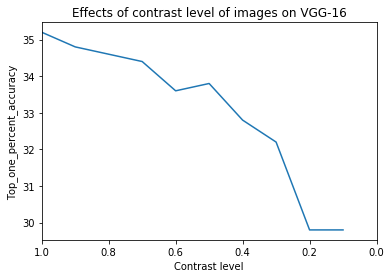

In [263]:
contrast_level=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
plt.plot(contrast_level,Top_one_percent_acc)
#plt.plot(contrast_level,Top_five_percent_acc, color='orange')
plt.xlabel('Contrast level')
plt.xlim(1, 0)
plt.ylabel('Top_one_percent_accuracy')
plt.title('Effects of contrast level of images on VGG-16')
plt.show()

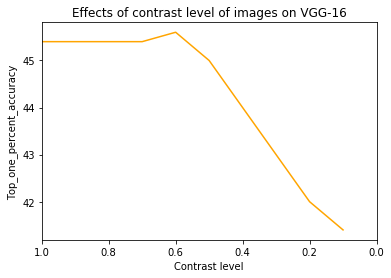

In [264]:
contrast_level=[1.0,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]
plt.plot(contrast_level,Top_five_percent_acc, color='orange')
plt.xlabel('Contrast level')
plt.xlim(1, 0)
plt.ylabel('Top_one_percent_accuracy')
plt.title('Effects of contrast level of images on VGG-16')
plt.show()